# Traitement des resultats / _Processing results_
## Opportunite GP (YvBfAdHB)

- Regroupez vos questions par groupes pour un traitement simplifie des resultats
- _Use groups to categorize your fields. It will make processing easier_


In [1]:
import mbr_typeform as mbr

tfs = mbr.tf_struct(formid='YvBfAdHB')

struct_d = tfs.get_form_structure()
form_title = tfs.get_title()
form_questions = tfs.get_fields()
form_responses = tfs.get_form_responses()
nb_responses = tfs.get_nb_responses()
form_groups = tfs.get_groups()

Group 1 : Apprenons à  se connaître
Group 2 : Votre rapport au numérique...
Group 3 : Enseignement et éducation...
Group 4 : L'offre culturelle numérique
Group 5 : Les sujets qui vous interessent
Group 6 : Pour conclure


# Apprenons à  se connaître // Group idex 0

## Sexes, hmmm... (id : oYqnhtesJuF5)

In [2]:
import matplotlib.pyplot as plt

# Le premier group a pour index 0
gidx = 0

# Get labels and results
qsex_title, sexname, sex_dtf = tfs.get_results(gidx=gidx,qid='oYqnhtesJuF5')

# Rappel des options :
print("Rappel des sexes possibles :\n ",sexname)

# dico_du_sex = un dataframe associe par sexe
dico_du_sex = {sexname[i]: sex_dtf[i] for i in range(len(sexname))}

Vous êtes...
dropdown
Rappel des sexes possibles :
  ['Non genré', 'Fluide', 'Un homme', 'Une femme']


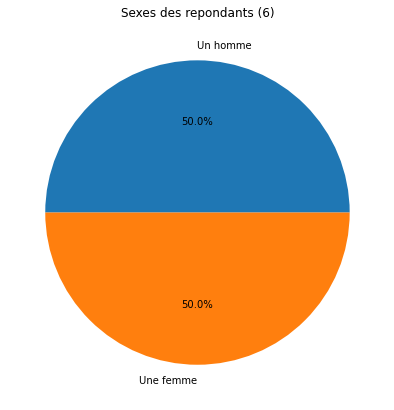

In [3]:
import matplotlib.pyplot as plt

# Clean them for nicer plot (no need of 0 results)
cln_opt, cln_res = mbr.clean_lists(labels=sexname, values=sex_dtf)
  
# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cln_res, labels = cln_opt, autopct='%1.1f%%')
plt.title('Sexes des repondants ('+ str(nb_responses) +')')
# Ajouter legende : nombre repondants
# Ajouter pourcentage sur les parts
plt.show()

## Tranche d'age ( id = BZsILkKYGzKQ )

In [4]:
# Get labels and results
qage_label, agelable, age_dtf = tfs.get_results(gidx=gidx,qid='BZsILkKYGzKQ')

# Rappel des options :
print("Rappel des ages possibles :\n ",agelable)

# dico_des_ages = un dataframe associe par sexe
dico_des_ages = {agelable[i]: age_dtf[i] for i in range(len(sexname))}

Quel est votre âge ?
dropdown
Rappel des ages possibles :
  ['Moins de 18 ans', 'Entre 18 et 25 ans', 'Entre 26 et 35 ans', 'Entre 36 et 50 ans', 'Entre 51 et 75 ans', '76 ans et plus']


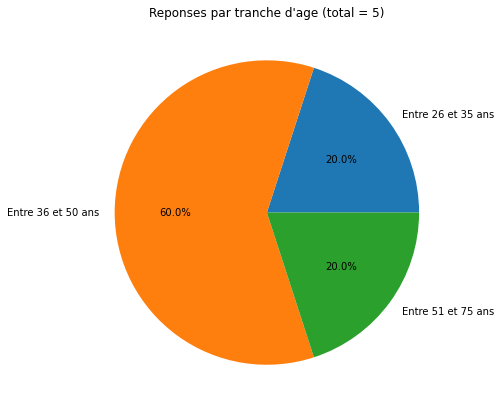

In [5]:
import matplotlib.pyplot as plt

# Clean them for nicer plot (no need of 0 results)
cln_age, cln_dtf = mbr.clean_lists(labels=agelable, values=age_dtf)

nb_valid_resp = 0
for i in range(len(age_dtf)) :
    nb_valid_resp += age_dtf[i].shape[0]

# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cln_dtf, labels = cln_age, autopct='%1.1f%%')
plt.title("Reponses par tranche d'age (total = "+str(nb_valid_resp)+")")
# Ajouter legende : nombre repondants
# Ajouter pourcentage sur les parts
plt.show()

### Tranche d'age par sexe

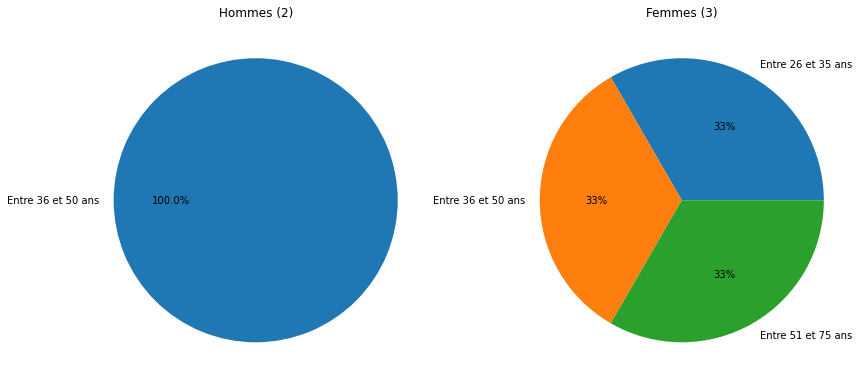

In [6]:
from pylab import *

df_men_res = dico_du_sex['Un homme']
df_women_res = dico_du_sex['Une femme']

# Une fois le df des hommes recuperer :
# Il faut recuperer la proportion des tranches d'age :
# ce qui depend de cln_age (les lables d'age pertinents)

# print(qage_label)


labels_m, dtf_res_m = mbr.dropdown_subresults(main_dtf=df_men_res, l_options=cln_age, q_name=qage_label)
cln_age_m, cln_dtf_m = mbr.clean_lists(labels=labels_m, values=dtf_res_m)

nb_valid_resp_m = 0
for i in range(len(dtf_res_m)) :
    nb_valid_resp_m += dtf_res_m[i].shape[0]

labels_w, dtf_res_w = mbr.dropdown_subresults(main_dtf=df_women_res, l_options=cln_age, q_name=qage_label)
cln_age_w, cln_dtf_w = mbr.clean_lists(labels=labels_w, values=dtf_res_w)

nb_valid_resp_w = 0
for i in range(len(dtf_res_w)) :
    nb_valid_resp_w += dtf_res_w[i].shape[0]

# Make figure and axes
fig, axs = plt.subplots(1, 2, figsize=(14, 10))

# A standard pie plot
axs[0].pie(cln_dtf_m, labels=cln_age_m, autopct='%1.1f%%')
axs[0].title.set_text('Hommes (' + str(nb_valid_resp_m) + ')')

# Shift the second slice using explode
axs[1].pie(cln_dtf_w, labels=cln_age_w, autopct='%.0f%%')
axs[1].title.set_text('Femmes (' + str(nb_valid_resp_w) + ')')

plt.show()

## Vivez-vous en France ? (id = M2yM4x72oiV3)

Vivez-vous en France ?
yes_no


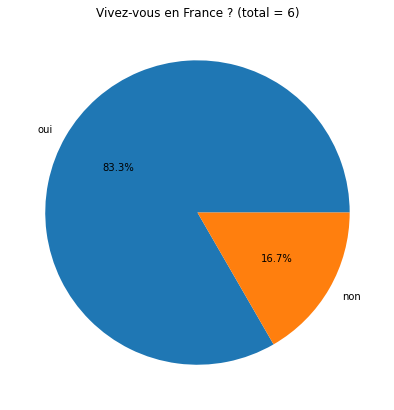

In [7]:
# Get labels and results
qFrance, labels, france_yn_dtf = tfs.get_results(gidx=gidx,qid='M2yM4x72oiV3')

cln_France_lb, cln_dtf_France = mbr.clean_lists(labels=labels, values=france_yn_dtf)

# dico_de_france = un dataframe par France / NonFrance
dico_de_france = {labels[i]: france_yn_dtf[i] for i in range(len(labels))}

# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cln_dtf_France, labels = cln_France_lb, autopct='%1.1f%%')
plt.title(qFrance + " (total = "+str(nb_responses)+")")
# Ajouter legende : nombre repondants
# Ajouter pourcentage sur les parts
plt.show()

## Dernier diplome ? (id = 8WoLUtHsWKKJ)

Quel fut votre dernier diplôme ?
dropdown


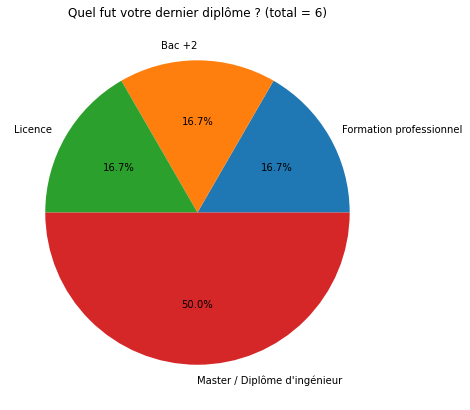

In [8]:
# Get labels and results
qdiplome, dpl_labels, diplome_dtfs = tfs.get_results(gidx=gidx,qid='8WoLUtHsWKKJ')

cln_dpl_labels, cln_diplome_dtfs = mbr.clean_lists(labels=dpl_labels, values=diplome_dtfs)

# dico_de_diplome = un dataframe par diplome
dico_de_diplome = {dpl_labels[i]: diplome_dtfs[i] for i in range(len(labels))}

nb_valid_resp = 0
for i in range(len(diplome_dtfs)) :
    nb_valid_resp += diplome_dtfs[i].shape[0]

# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cln_diplome_dtfs, labels = cln_dpl_labels, autopct='%1.1f%%')
plt.title(qdiplome + " (total = "+str(nb_valid_resp)+")")
# Ajouter legende : nombre repondants
# Ajouter pourcentage sur les parts
plt.show()

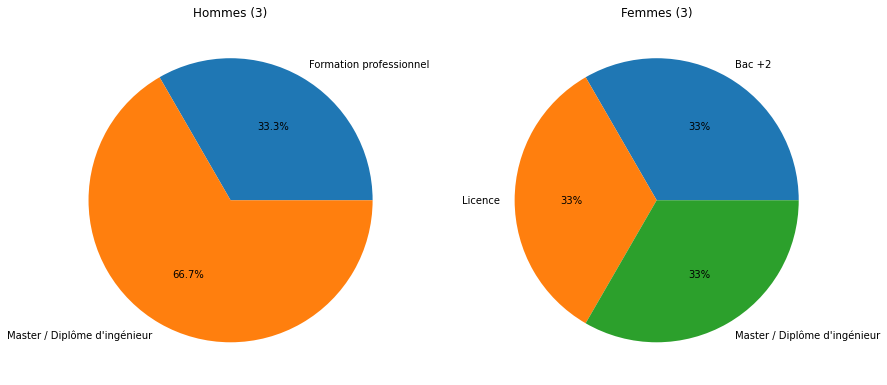

In [9]:
labels_m, dtf_res_m = mbr.dropdown_subresults(main_dtf=df_men_res, l_options=cln_dpl_labels, q_name=qdiplome)
cln_age_m, cln_dtf_m = mbr.clean_lists(labels=labels_m, values=dtf_res_m)

nb_valid_resp_m = 0
for i in range(len(dtf_res_m)) :
    nb_valid_resp_m += dtf_res_m[i].shape[0]

labels_w, dtf_res_w = mbr.dropdown_subresults(main_dtf=df_women_res, l_options=cln_dpl_labels, q_name=qdiplome)
cln_age_w, cln_dtf_w = mbr.clean_lists(labels=labels_w, values=dtf_res_w)

nb_valid_resp_w = 0
for i in range(len(dtf_res_w)) :
    nb_valid_resp_w += dtf_res_w[i].shape[0]

# Make figure and axes
fig, axs = plt.subplots(1, 2, figsize=(14, 10))

# A standard pie plot
axs[0].pie(cln_dtf_m, labels=cln_age_m, autopct='%1.1f%%')
axs[0].title.set_text('Hommes (' + str(nb_valid_resp_m) + ')')

# Shift the second slice using explode
axs[1].pie(cln_dtf_w, labels=cln_age_w, autopct='%.0f%%')
axs[1].title.set_text('Femmes (' + str(nb_valid_resp_w) + ')')

plt.show()

## Secteur public ? (id = vMmUInJ5B4C9)


Travaillez-vous dans le secteur public ?
yes_no


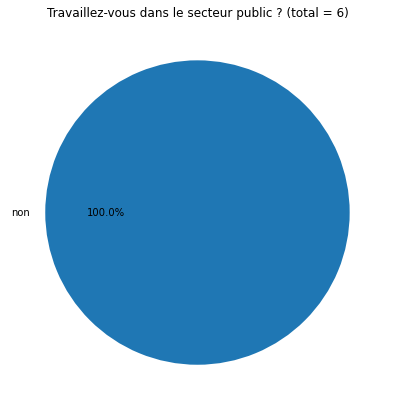

In [10]:
# Get labels and results
qPublic, labels, public_yn_dtf = tfs.get_results(gidx=gidx,qid='vMmUInJ5B4C9')

cln_public_lb, cln_dtf_public = mbr.clean_lists(labels=labels, values=public_yn_dtf)

# dico_de_secteur_public = un dataframe par diplome
dico_de_secteur_public = {labels[i]: public_yn_dtf[i] for i in range(len(labels))}

nb_valid_resp = 0
for i in range(len(public_yn_dtf)) :
    nb_valid_resp += public_yn_dtf[i].shape[0]


# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cln_dtf_public, labels = cln_public_lb, autopct='%1.1f%%')
plt.title(qPublic + " (total = "+str(nb_valid_resp)+")")
# Ajouter legende : nombre repondants
# Ajouter pourcentage sur les parts
plt.show()

## Si secteur public, Secteur culturel ? ( id = 4dOyMP97omhJ )

In [11]:
# Get labels and results
qCulture, labels, culture_yn_dtf = tfs.get_results(gidx=gidx,qid='4dOyMP97omhJ')

cln_culture_lb, cln_dtf_culture = mbr.clean_lists(labels=labels, values=culture_yn_dtf)

# dico_de_secteur_culturel = un dataframe par diplome
dico_de_secteur_culturel = {labels[i]: culture_yn_dtf[i] for i in range(len(labels))}

if len(cln_culture_lb) > 0 :
    # show plot
    fig = plt.figure(figsize =(10, 7))
    plt.pie(cln_dtf_culture, labels = cln_culture_lb, autopct='%1.1f%%')
    plt.title(qCulture + " (total = "+str(nb_responses)+")")
    plt.show()
else :
    print('No result')

Travaillez-vous dans le secteur culturel ?
yes_no
No result


## Specialites / domaine de competence ( id = OnnjlaZauNJ0 )

Quelle est votre spécialité ?
picture_choice


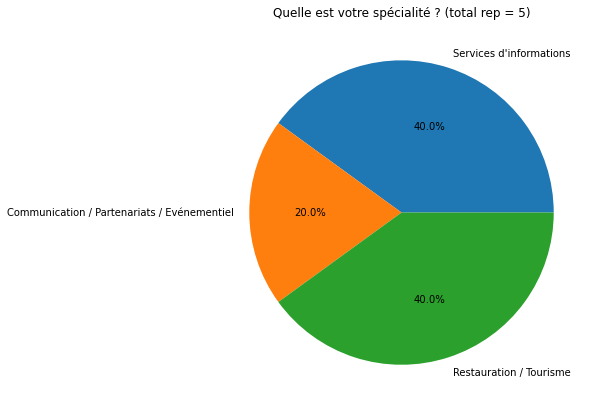

In [12]:
# Get labels and results
qScpecialite, spec_lbls, spec_dtfs = tfs.get_results(gidx=0,qid='OnnjlaZauNJ0')

cln_spec_lb, cln_dtf_spec = mbr.clean_lists(labels=spec_lbls, values=spec_dtfs)

# dico_de_specialite
dico_de_specialite = {spec_lbls[i]: spec_dtfs[i] for i in range(len(spec_lbls))}

nb_valid_resp = 0

for i in range(len(spec_dtfs)) :
    nb_valid_resp += spec_dtfs[i].shape[0]

if len(cln_spec_lb) > 0 :
    # show plot
    fig = plt.figure(figsize =(10, 7))
    plt.pie(cln_dtf_spec, labels = cln_spec_lb, autopct='%1.1f%%')
    plt.title(qScpecialite + " (total rep = "+str(nb_valid_resp)+")")
    plt.show()
else :
    print('No result')

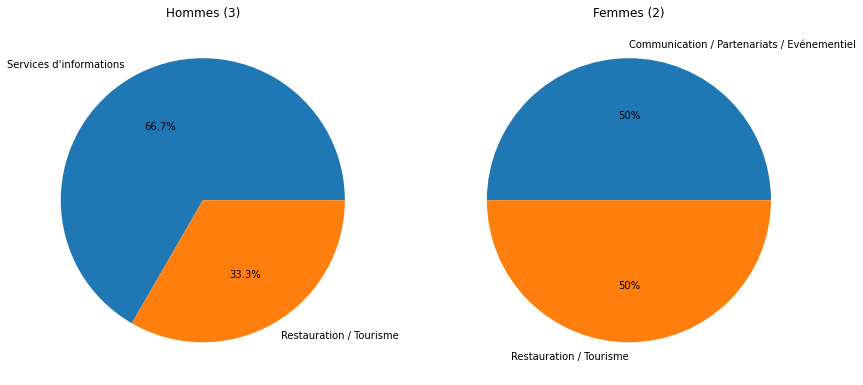

In [13]:
labels_m, dtf_res_m = mbr.dropdown_subresults(main_dtf=df_men_res, l_options=cln_spec_lb, q_name=qScpecialite)
cln_age_m, cln_dtf_m = mbr.clean_lists(labels=labels_m, values=dtf_res_m)

nb_valid_resp_m = 0
for i in range(len(dtf_res_m)) :
    nb_valid_resp_m += dtf_res_m[i].shape[0]

labels_w, dtf_res_w = mbr.dropdown_subresults(main_dtf=df_women_res, l_options=cln_spec_lb, q_name=qScpecialite)
cln_age_w, cln_dtf_w = mbr.clean_lists(labels=labels_w, values=dtf_res_w)

nb_valid_resp_w = 0
for i in range(len(dtf_res_w)) :
    nb_valid_resp_w += dtf_res_w[i].shape[0]

# Make figure and axes
fig, axs = plt.subplots(1, 2, figsize=(14, 10))

# A standard pie plot
axs[0].pie(cln_dtf_m, labels=cln_age_m, autopct='%1.1f%%')
axs[0].title.set_text('Hommes (' + str(nb_valid_resp_m) + ')')

# Shift the second slice using explode
axs[1].pie(cln_dtf_w, labels=cln_age_w, autopct='%.0f%%')
axs[1].title.set_text('Femmes (' + str(nb_valid_resp_w) + ')')

plt.show()

# Votre rapport au numérique // Group index = 1

In [14]:
gidx = 1

## Quand utilisez-vous l'IT ? ( id =  EyykV9VMHRBS )

Quand utilisez-vous le plus souvent des outils numériques ?
multiple_choice


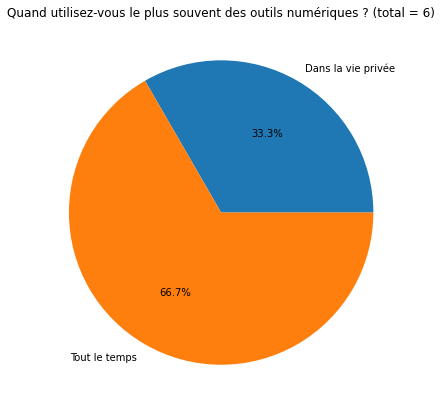

In [17]:
# Get labels and results
qtimetoIT, it_time_lbls, it_time_dtf = tfs.get_results(gidx=1,qid='EyykV9VMHRBS')

# dico_des_ages = un dataframe associe par sexe
dico_des_ITtime = {it_time_lbls[i]: it_time_dtf[i] for i in range(len(it_time_lbls))}


cln_itt_labels, cln_itt_dtfs = mbr.clean_lists(labels=it_time_lbls, values=it_time_dtf)


nb_valid_resp = 0
for i in range(len(it_time_dtf)) :
    nb_valid_resp += it_time_dtf[i].shape[0]

# show plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cln_itt_dtfs, labels = cln_itt_labels, autopct='%1.1f%%')
plt.title(qtimetoIT + " (total = "+str(nb_valid_resp)+")")
# Ajouter legende : nombre repondants
# Ajouter pourcentage sur les parts
plt.show()